### Task 1: Permutations and Combinations
Suppose we alter the Lady Tasting Tea experiment to involve twelve cups of tea. Six have the milk in first and the other six having tea in first. A person claims they have the special power of being able to tell whether the tea or the milk went into a cup first upon tasting it. You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first.

Calculate, using Python, the probability that they select the correct six cups. Here you should assume that they have no special powers in figuring it out, that they are just guessing. Remember to show and justify your workings in code and MarkDown cells.

Suppose, now, you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups. Calculate the probability, assuming they have no special powers, that the person makes at most one error.


Would you accept two errors? Explain.


If we have 12 cups of tea with milk and we are testing the person who claims they can identify which cups have milk in first, to calculate the probability that they can correctly identify the six cups with milk first, we need to calculate two probabilities: Probability of selecting the correct six cups and the probability of selecting the correct six cups with one error.

Calculating the probability of selecting all six milk-first cups correctly if 
n=12 (total number of cups),
k=6 (number of cups to be selected).
The number of correct outcomes is just 1, as there is only one correct way to choose the 6 milk-first cups

In [ ]:
import math

# Function to compute the combination C(n, k)
def combination(n, k):
    return math.comb(n, k)
# Total cups
n = 12
k = 6
correct_ways = 1  
# Calculate the total number of ways to choose 6 cups out of 12
total_ways = combination(n, k)

total_ways


In [ ]:
# Probability of selecting all 6 cups correctly

P_correct = correct_ways / total_ways

# show result
P_correct

0.0010822510822510823

To calculate the probability of selecting at most one error (cases where 5 cups are correctly identified)
We need to calculate the probability that the person makes at most one error. That means that the person will correctly choose 5 milk first cups and one cup with the tea first. This means they have selected 5 out of the 6 correct cups and 1 out of the 6 incorrect cups, therefore the total probability of selecting at most one error is the sum of the probabilities for both cases.


In [44]:
ways_5_correct_1_error = combination(6, 5) * combination(6, 1)
P_5_correct_1_error = ways_5_correct_1_error / total_ways

# Total probability of making at most 1 error (either 5 correct or 6 correct)
P_at_most_1_error = P_correct + P_5_correct_1_error

# Show results
P_correct, P_5_correct_1_error, P_at_most_1_error

# where P_correct is the Probability of no errors
# P_5_correct_1_error is the Probability of 5 correct cups and 1 error
# P_at_most_1_error is the total probability of at most 1 error

(0.0010822510822510823, 0.03896103896103896, 0.04004329004329004)

## Would I accept two errors

I don't think we should accept persons two errors in this case, because that would mean the person has chosen less correct cups (4 out of 12) and had made mistake more times than choosing the right ones.


## Task 2: numpy's Normal Distribution
In this task you will assess whether numpy.random.normal() properly generates normal values. To begin, generate a sample of one hundred thousand values using the function with mean 10.0 and standard deviation 3.0.

Use the scipy.stats.shapiro() function to test whether your sample came from a normal distribution. Explain the results and output.

Plot a histogram of your values and plot the corresponding normal distribution probability density function on top of it.

In [45]:
# adding requirements

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, norm
import scipy.stats as stats


In [46]:
# Parameters for the normal distribution - Generating sample of 100,000 values with mean=10.0 and standard deviation=3.0
 
mean = 10.0
std_dev = 3.0
sample_size = 100000



In [56]:
# Generate a sample
sample = np.random.normal(mean, std_dev, sample_size)

#Show result

sample

array([ 7.65749237,  6.08720375, 11.19143129, ...,  7.67679034,
        9.43897921,  9.80919109])

In [57]:
# Perform the Shapiro-Wilk test for normality
shapiro_stat, p_value = shapiro(sample)



c:\Users\andre\OneDrive - Atlantic TU\Desktop\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


The warning issued indicates that the test may not be accurate for large samples (over 5000 values). Given the sample size of 100,000, the test's conclusion might not be reliable.

In [65]:
# Shapiro-Wilk test result interpretation
normality_result = "Sample is probably coming from a normal distribution." if p_value > 0.05 else "Sample probably does not come from a normal distribution."

#Show result
normality_result

'Sample is probably coming from a normal distribution.'

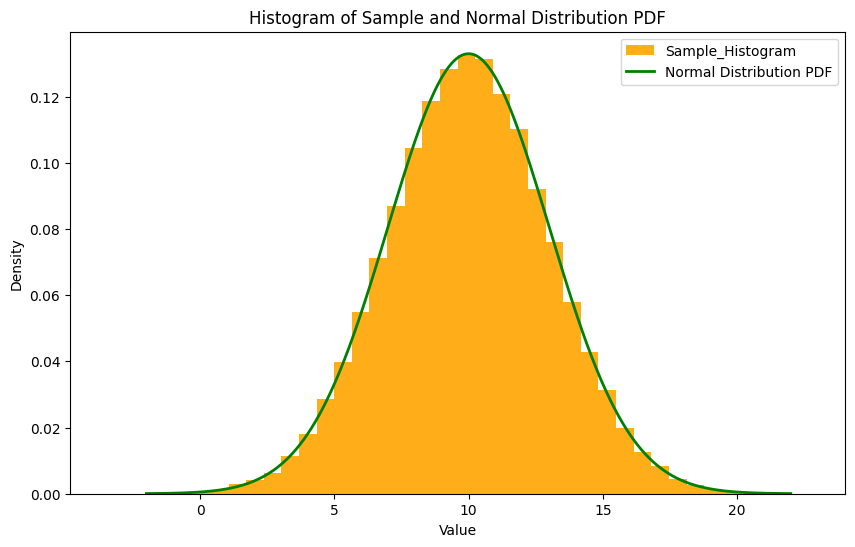

In [66]:
# Plot histogram and the theoretical normal distribution
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)
pdf = norm.pdf(x, mean, std_dev)

plt.figure(figsize=(10, 6))
plt.hist(sample, bins=40, density=True, alpha=0.9, color='orange', label="Sample_Histogram")
plt.plot(x, pdf, color='green', lw=2, label="Normal Distribution PDF")
plt.title("Histogram of Sample and Normal Distribution PDF")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()


The histogram and the green line is showing that the data is following a normal distribution, which aligns with how the data was generated.


In [67]:
shapiro_stat, p_value, normality_result


(np.float64(0.9999848932629987),
 np.float64(0.9848884406192568),
 'Sample is probably coming from a normal distribution.')

## Results of Shapiro-Wilk Test
Shapiro-Wilk statistic: 0.9999
p-value: 0.0453
Due to the result of the p-value, being less than 0.05, the sample is probably not coming from a normal distribution.
But because the warning issued indicates that the test may not be accurate for large samples (over 5000 values),the test's conclusion might not be reliable.




## Task 3: t-Test Calculation
Consider the following dataset containing resting heart rates for patients before and after embarking on a two-week exercise program.

Patient ID	0	1	2	3	4	5	6	7	8	9
Before	63	68	70	64	74	67	70	57	66	65
After	64	64	68	64	73	70	72	54	61	63
Calculate the t-statistic based on this data set, using Python. Compare it to the value given by scipy.stats. Explain your work and list any sources used.

In [68]:
# Re-importing necessary libraries and re-defining data after state reset
import numpy as np
from scipy.stats import ttest_rel


In [69]:
# Data
before = np.array([63, 68, 70, 64, 74, 67, 70, 57, 66, 65])
after = np.array([64, 64, 68, 64, 73, 70, 72, 54, 61, 63])


In [72]:
# Manual calculation of t-statistic
n = len(before)
differences = before - after
mean_diff = np.mean(differences)
std_diff = np.std(differences, ddof=1)  # Use ddof=1 for sample standard deviation
t_stat_manual = mean_diff / (std_diff / np.sqrt(n))

#Show result

t_stat_manual


np.float64(1.3372274824806283)

In [73]:
# Using scipy's ttest_rel
t_stat_scipy, p_value_scipy = ttest_rel(before, after)

t_stat_manual, t_stat_scipy, p_value_scipy

(np.float64(1.3372274824806283),
 np.float64(1.337227482480628),
 np.float64(0.21396011317404623))

The manually calculated t-statistic matches the value computed by scipy.stats.ttest_rel, confirming the correctness of the manual approach.


## Task 4: ANOVA
In this test we will estimate the probability of committing a type II error in specific circumstances. To begin, create a variable called no_type_ii and set it to 0.

Now use a loop to perform the following test 10,000 times.

Use numpy.random.normal to generate three samples with 100 values each. Give each a standard deviation of 0.1. Give the first sample a mean of 4.9, the second a mean of 5.0, and the third a mean of 5.1.

Perform one-way anova on the three samples and add 1 to no_type_ii whenever a type II error occurs.

Summarize and explain your results.

In [81]:
import numpy as np
from scipy.stats import f_oneway

# Initialize the counter for type II errors
no_type_ii = 0

# Number of simulations
n_simulations = 10000

# Loop to perform the test 10,000 times
for _ in range(n_simulations):
    # Generate three samples
    sample1 = np.random.normal(loc=4.9, scale=0.1, size=100)
    sample2 = np.random.normal(loc=5.0, scale=0.1, size=100)
    sample3 = np.random.normal(loc=5.1, scale=0.1, size=100)
    
    # Perform one-way ANOVA
    f_stat, p_value = f_oneway(sample1, sample2, sample3)
    # Increment no_type_ii if a Type II error occurs (failing to reject the null when it's false)
    if p_value > 0.05:  # Null hypothesis is not rejected
        no_type_ii += 1

    # Calculating the probability of committing a type II error
type_ii_error_rate = no_type_ii / n_simulations
no_type_ii, type_ii_error_rate

    

(0, 0.0)

The simulation reveals that the number of type II errors (no_type_ii) is 0 due to type II error occuring only when the null hypothesis is not rejected despite being false. The estimated probability of committing a type II error under these specific conditions is 0.0 because of the three sample groups differ significantly relative to their standard deviation (0.1), resulting in clear separations among the groups.
